In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("employee_train.csv")
test_df = pd.read_csv("employee_test.csv")

In [3]:
train_df.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
test_df.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/29/2014 11:32,39,Male,United Kingdom,NaN,Yes,Yes,Sometimes,5-Jan,...,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,Yes,These result may be a tad confusing so a summa...
1,2,8/29/2014 11:32,26,female,United States,WA,No,Yes,Sometimes,More than 1000,...,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes,I should note one of the places my employer fa...
2,3,8/29/2014 11:33,23,Female,United States,IL,No,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,No,No,NaN
3,4,8/29/2014 11:34,35,Male,Switzerland,NaN,No,Yes,Often,More than 1000,...,Very easy,No,No,Some of them,Some of them,No,Maybe,No,No,NaN
4,5,8/29/2014 11:36,36,Male,United States,FL,No,No,Never,5-Jan,...,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN


In [5]:
train_df.shape

(1048, 28)

In [6]:
test_df.shape

(210, 27)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.No                       1048 non-null   int64 
 1   Timestamp                  1048 non-null   object
 2   Age                        1048 non-null   int64 
 3   Gender                     1048 non-null   object
 4   Country                    1048 non-null   object
 5   state                      636 non-null    object
 6   self_employed              1030 non-null   object
 7   family_history             1048 non-null   object
 8   treatment                  1048 non-null   object
 9   work_interfere             812 non-null    object
 10  no_employees               1048 non-null   object
 11  remote_work                1048 non-null   object
 12  tech_company               1048 non-null   object
 13  benefits                   1035 non-null   object
 14  care_opt

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.No                       210 non-null    int64 
 1   Timestamp                  210 non-null    object
 2   Age                        210 non-null    int64 
 3   Gender                     210 non-null    object
 4   Country                    210 non-null    object
 5   state                      107 non-null    object
 6   self_employed              210 non-null    object
 7   family_history             210 non-null    object
 8   work_interfere             182 non-null    object
 9   no_employees               210 non-null    object
 10  remote_work                210 non-null    object
 11  tech_company               210 non-null    object
 12  benefits                   207 non-null    object
 13  care_options               210 non-null    object
 14  wellness_p

In [9]:
train_df.describe()

,S.No,Age
count,1048.000000,1.048000e+03
mean,524.500000,9.541988e+07
std,302.675844,3.089010e+09
min,1.000000,-1.726000e+03
25%,262.750000,2.700000e+01
50%,524.500000,3.100000e+01
75%,786.250000,3.600000e+01
max,1048.000000,1.000000e+11


In [10]:
test_df.describe()

,S.No,Age
count,210.000000,210.000000
mean,105.500000,32.547619
std,60.765944,8.061968
min,1.000000,-1.000000
25%,53.250000,27.000000
50%,105.500000,32.000000
75%,157.750000,37.750000
max,210.000000,72.000000


In [11]:
train_df.isnull().sum()

S.No                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        412
self_employed                 18
family_history                 0
treatment                      0
work_interfere               236
no_employees                   0
remote_work                    0
tech_company                   0
benefits                      13
care_options                   0
wellness_program               4
seek_help                      0
anonymity                      0
leave                          4
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     916
dtype: int64

In [12]:
train_df.isnull().sum()*100/train_df.shape[0] 

S.No                          0.000000
Timestamp                     0.000000
Age                           0.000000
Gender                        0.000000
Country                       0.000000
state                        39.312977
self_employed                 1.717557
family_history                0.000000
treatment                     0.000000
work_interfere               22.519084
no_employees                  0.000000
remote_work                   0.000000
tech_company                  0.000000
benefits                      1.240458
care_options                  0.000000
wellness_program              0.381679
seek_help                     0.000000
anonymity                     0.000000
leave                         0.381679
mental_health_consequence     0.000000
phys_health_consequence       0.000000
coworkers                     0.000000
supervisor                    0.000000
mental_health_interview       0.000000
phys_health_interview         0.000000
mental_vs_physical       

In [13]:
test_df.isnull().sum()

S.No                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        103
self_employed                  0
family_history                 0
work_interfere                28
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       3
care_options                   0
wellness_program               2
seek_help                      0
anonymity                      0
leave                          5
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     178
dtype: int64

In [14]:
test_df.isnull().sum()*100/test_df.shape[0] 

S.No                          0.000000
Timestamp                     0.000000
Age                           0.000000
Gender                        0.000000
Country                       0.000000
state                        49.047619
self_employed                 0.000000
family_history                0.000000
work_interfere               13.333333
no_employees                  0.000000
remote_work                   0.000000
tech_company                  0.000000
benefits                      1.428571
care_options                  0.000000
wellness_program              0.952381
seek_help                     0.000000
anonymity                     0.000000
leave                         2.380952
mental_health_consequence     0.000000
phys_health_consequence       0.000000
coworkers                     0.000000
supervisor                    0.000000
mental_health_interview       0.000000
phys_health_interview         0.000000
mental_vs_physical            0.000000
obs_consequence          

In [15]:
train_df.duplicated().sum()

0

In [16]:
test_df.duplicated().sum()

0

In [17]:
train_df['Timestamp'] = pd.to_datetime(train_df['Timestamp'])
test_df['Timestamp'] = pd.to_datetime(test_df['Timestamp'])

In [18]:
train_df.drop(['no_employees'], axis=1, inplace= True)
test_df.drop(['no_employees'], axis=1, inplace= True)

In [19]:
train_df.drop(columns=['state','comments'], inplace=True)
test_df.drop(columns=['state','comments'], inplace=True)

In [20]:
train_df['work_interfere'].fillna(train_df['work_interfere'].mode()[0], inplace=True)
test_df['work_interfere'].fillna(test_df['work_interfere'].mode()[0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\4270694155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['work_interfere'].fillna(train_df['work_interfere'].mode()[0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\4270694155.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [21]:
train_df.drop(columns=['S.No'], inplace=True)
test_df.drop(columns=['S.No'], inplace=True)

In [22]:
train_df.drop(columns=['Timestamp'], inplace=True)
test_df.drop(columns=['Timestamp'], inplace=True)

In [23]:
categorical_cols = ['self_employed','benefits', 'wellness_program', 'leave']
for col in categorical_cols:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\2485736888.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\2485736888.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [24]:
train_df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [25]:
test_df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
work_interfere               0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [26]:
cat = []
num = []
for i in train_df.columns:
    if train_df[i].dtype == 'O':
        print(i,train_df[i].nunique(), train_df[i].unique())
        cat.append(i)
    else:
        num.append(i)

Gender 45 ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr']
Country 42 ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Bahamas, The']
self_employed 2 ['No'

In [27]:
cat

['Gender',
 'Country',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

In [28]:
num

['Age']

In [29]:
train_df['Gender'].value_counts()

Gender
Male                        518
male                        162
M                           100
Female                       99
female                       48
F                            33
m                            30
f                            13
Make                          4
Female                        2
Cis Male                      2
Woman                         2
Female (trans)                2
Man                           2
Male                          1
Agender                       1
cis-female/femme              1
Guy (-ish) ^_^                1
male leaning androgynous      1
A little about you            1
Mail                          1
Female (cis)                  1
msle                          1
Neuter                        1
Androgyne                     1
queer                         1
cis male                      1
Trans woman                   1
Nah                           1
Genderqueer                   1
fluid                         1
E

In [30]:
male_terms = {'male', 'm', 'male ', 'guy (-ish) ^_^', 'mail', 'mal', 'malr', 'male-ish', 'something kinda male?',
              'cis male', 'cis male ', 'male (cis)', 'cis male', 'msle', 'maile', 'make'}
female_terms = {'female', 'f', 'female ', 'woman', 'femake', 'cis female', 'cis-female/femme',
                'female (cis)', 'female (trans)', 'trans woman', 'trans-female'}

In [31]:
def classify_gender(gender):
    gender = str(gender).strip().lower()  # Convert to lowercase and remove spaces
    if gender in male_terms:
        return 1
    elif gender in female_terms:
        return 0
    else:
        return 2  # Non-binary, unclear, or other

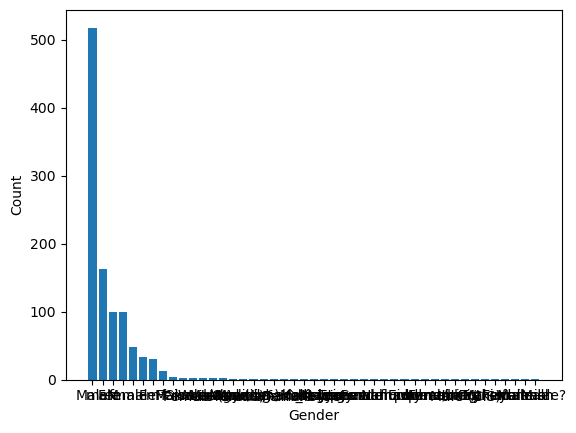

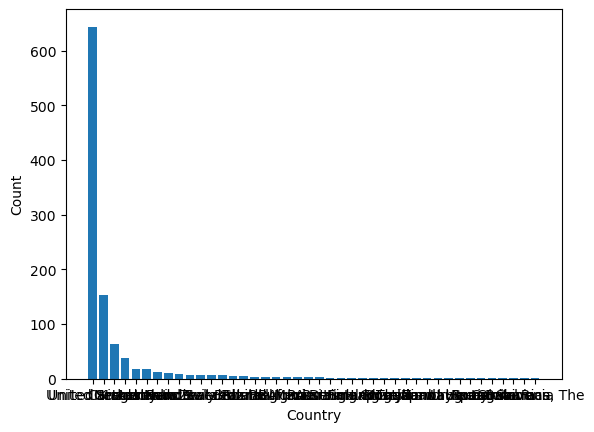

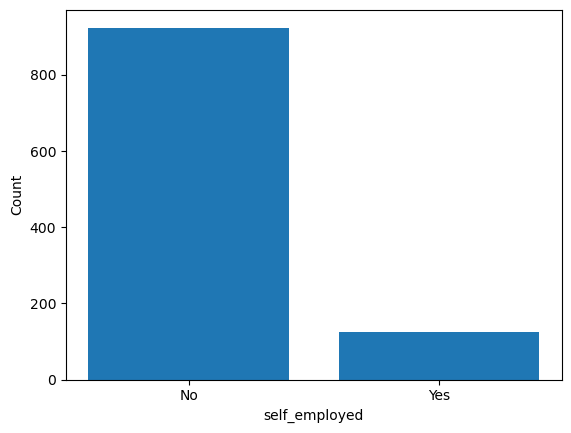

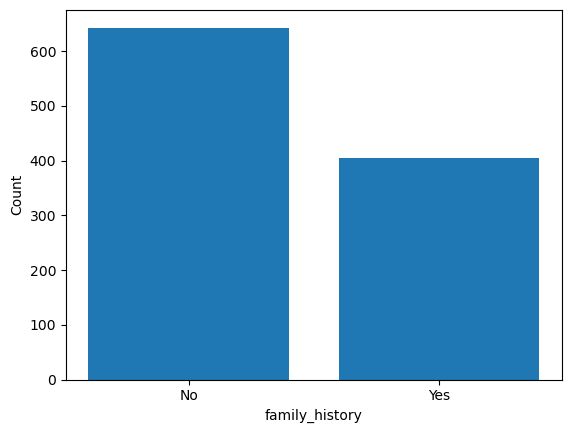

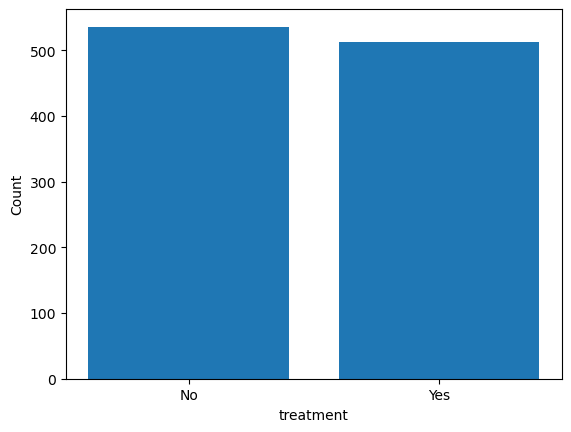

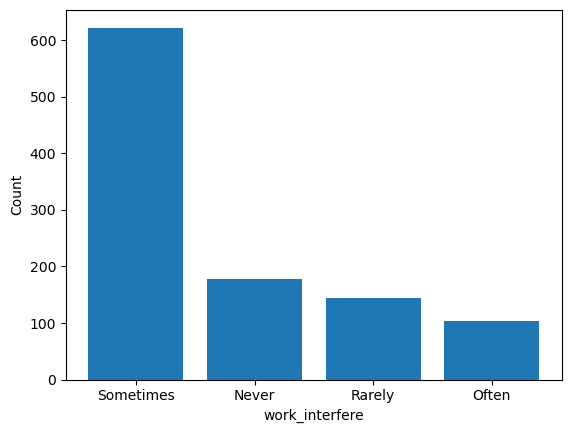

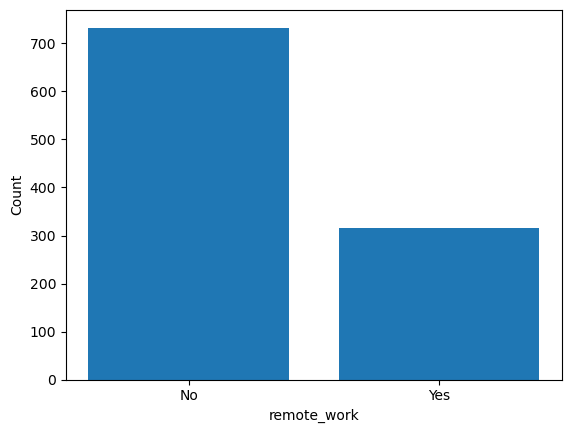

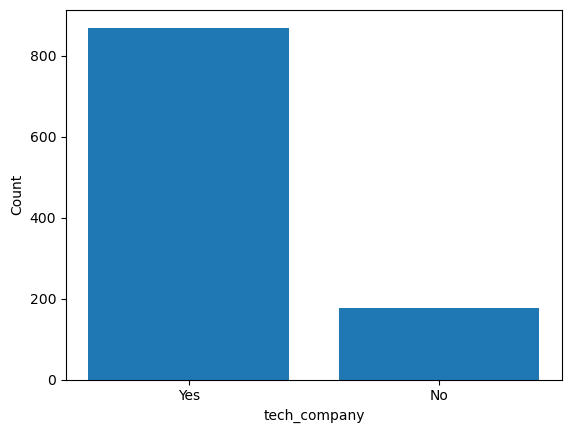

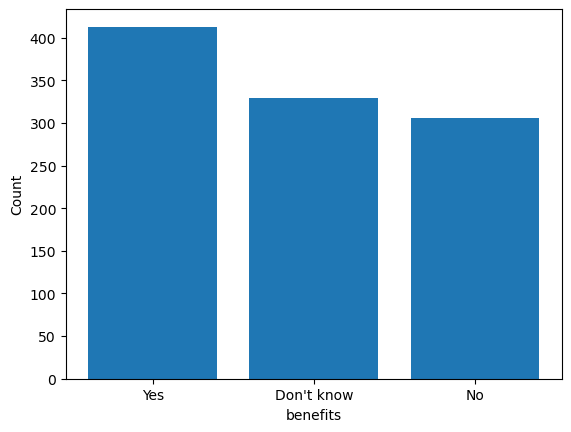

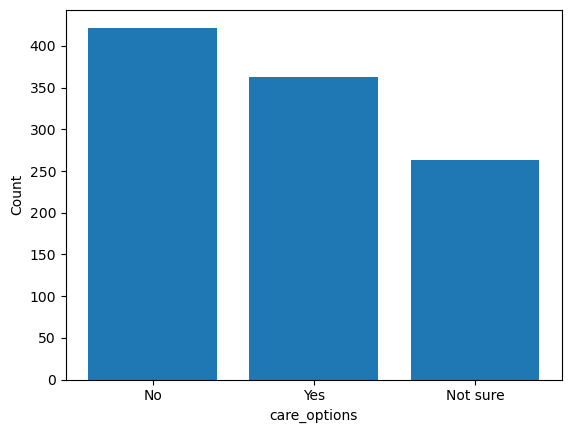

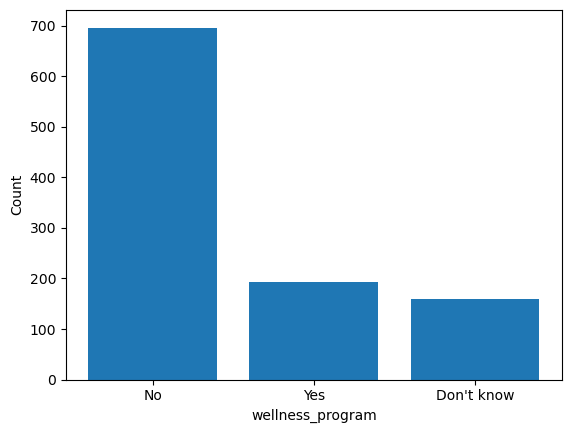

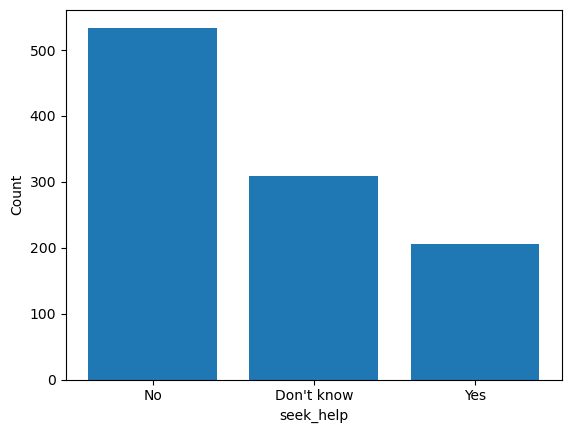

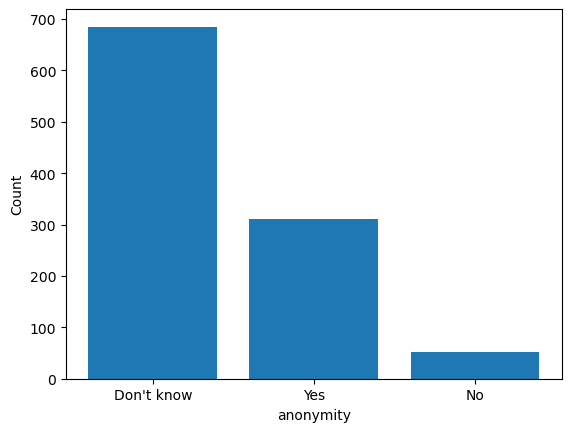

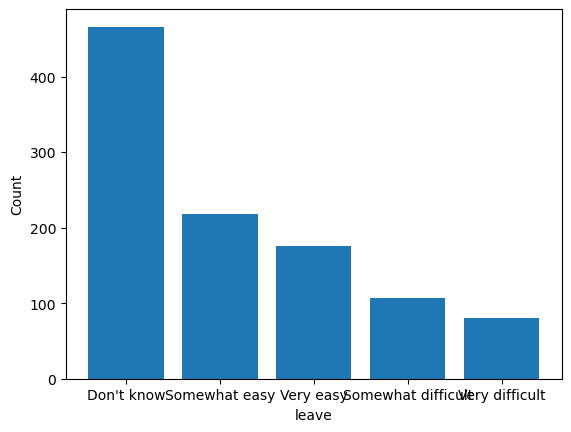

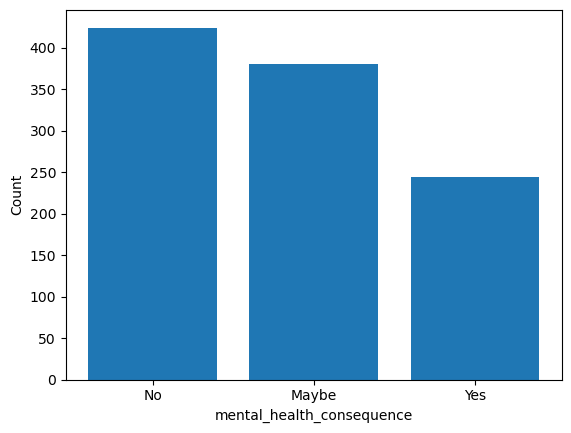

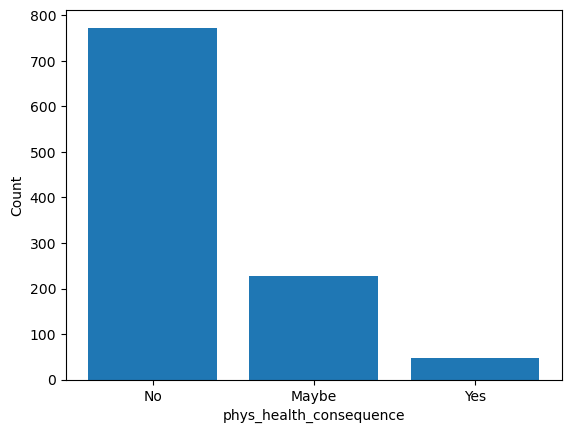

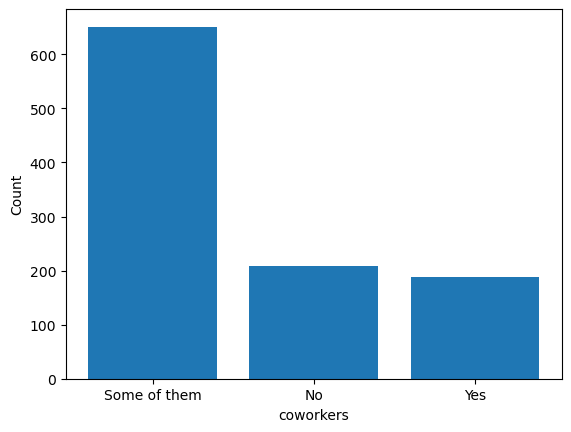

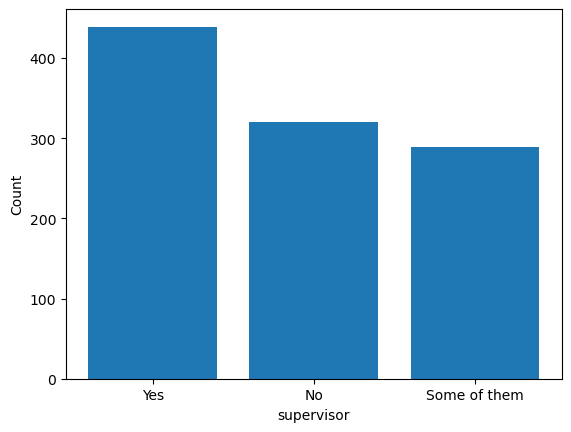

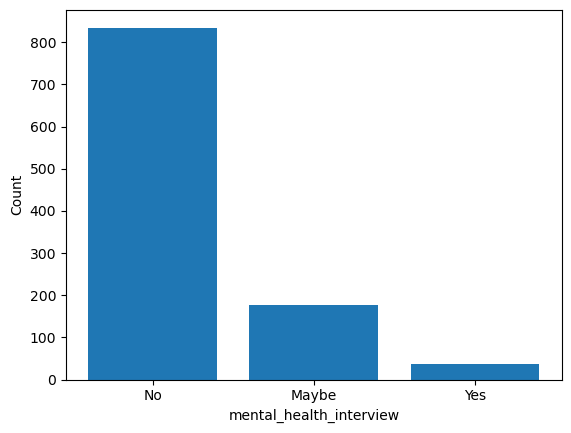

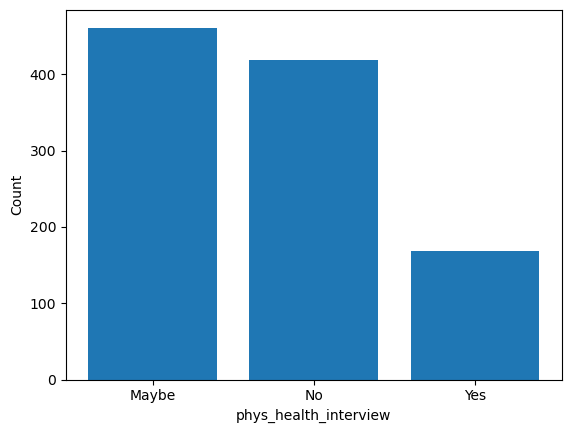

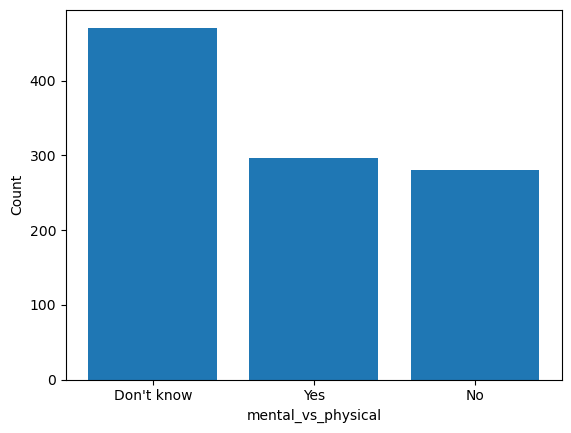

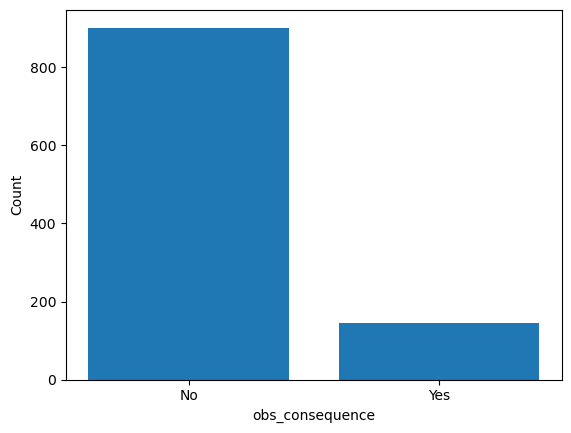

In [32]:
for i in cat:
    vc = train_df[i].value_counts()
    plt.bar(vc.index, height = vc)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

In [33]:
train_df['Gender'] = train_df['Gender'].apply(classify_gender)

In [34]:
train_df['Gender'].value_counts()

Gender
1    827
0    206
2     15
Name: count, dtype: int64

In [35]:
test_df['Gender'].value_counts()

Gender
Male                                              96
male                                              44
Female                                            22
M                                                 16
female                                            14
F                                                  5
m                                                  4
Male                                               2
f                                                  2
p                                                  1
Woman                                              1
femail                                             1
Cis Man                                            1
ostensibly male, unsure what that really means     1
Name: count, dtype: int64

In [36]:
test_df['Gender'] = test_df['Gender'].apply(classify_gender)

In [37]:
test_df['Gender'].value_counts()

Gender
1    162
0     44
2      4
Name: count, dtype: int64

In [38]:
train_df.drop(['Country','self_employed','tech_company', 'wellness_program','mental_health_interview'],axis=1, inplace=True)
test_df.drop(['Country','self_employed','tech_company', 'wellness_program','mental_health_interview'],axis=1, inplace=True)

In [39]:
train_df['Age'].value_counts()

Age
 29             73
 32             64
 33             63
 26             63
 27             61
 31             57
 28             56
 30             56
 34             52
 35             49
 25             48
 23             41
 24             38
 37             36
 36             31
 38             30
 40             26
 39             26
 43             23
 22             20
 42             17
 41             15
 21             15
 45              9
 19              9
 44              8
 18              7
 46              7
 48              5
 50              5
 49              4
 51              4
 20              4
 57              3
 54              3
 55              3
 56              3
 47              2
 99999999999     1
 329             1
 60              1
 58              1
 62              1
 65              1
-29              1
-1726            1
 5               1
 53              1
 61              1
 8               1
Name: count, dtype: int64

In [40]:
mean_age = train_df[(train_df['Age'] >= 18) & (train_df['Age'] <= 60)]['Age'].mean()

In [41]:
train_df['Age'] = train_df['Age'].apply(lambda x: mean_age if (x < 18 or x > 60) else x)

In [42]:
new_mean_age = train_df['Age'].mean()
print("Mean Age after replacing extreme values:", new_mean_age)

Mean Age after replacing extreme values: 31.832531280076996


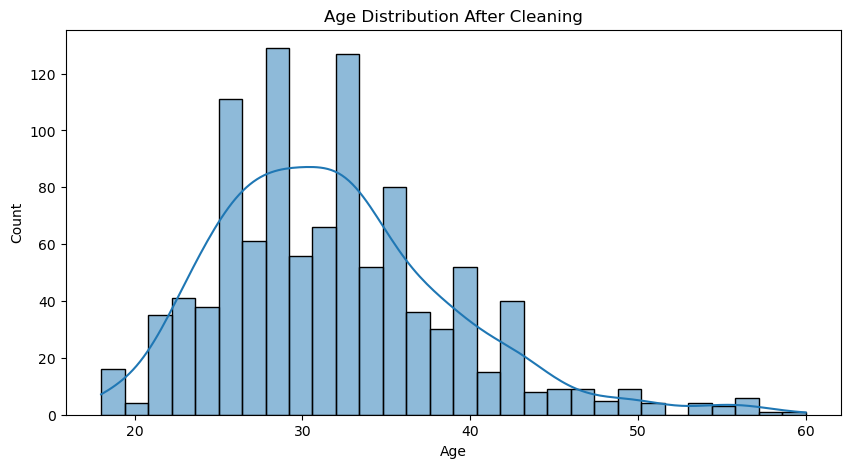

In [43]:
plt.figure(figsize=(10,5))
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title("Age Distribution After Cleaning")
plt.xlabel("Age")
plt.show()

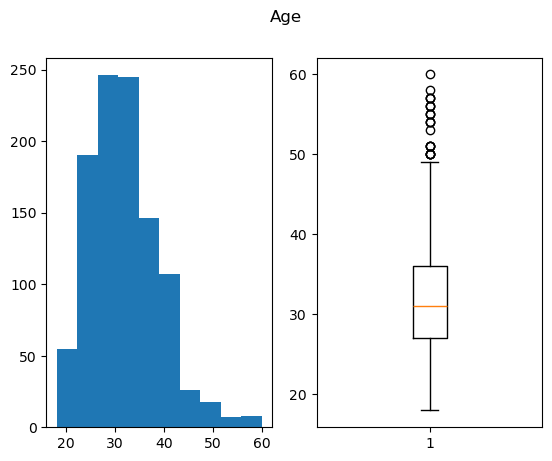

In [44]:
for i in num:
    fig, ax = plt.subplots(1,2)
    ax[0].hist(train_df[i])
    ax[1].boxplot(train_df[i])
    plt.suptitle(i)
    plt.show()

In [45]:
train_df['family_history'].value_counts()

family_history
No     643
Yes    405
Name: count, dtype: int64

In [46]:
train_df['family_history'].replace(to_replace=['No','Yes'], value=[1,0], inplace= True)
test_df['family_history'].replace(to_replace=['No','Yes'], value=[1,0], inplace= True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\3468358363.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['family_history'].replace(to_replace=['No','Yes'], value=[1,0], inplace= True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\3468358363.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting

In [47]:
train_df['family_history'].value_counts()

family_history
1    643
0    405
Name: count, dtype: int64

In [48]:
train_df['work_interfere'].value_counts()

work_interfere
Sometimes    622
Never        178
Rarely       144
Often        104
Name: count, dtype: int64

In [49]:
train_df['work_interfere'].replace(to_replace=['Sometimes','unknown','Never','Rarely','Often'], value=[3,0,1,2,4], inplace=True)
test_df['work_interfere'].replace(to_replace=['Sometimes','unknown','Never','Rarely','Often'], value=[3,0,1,2,4], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\509793407.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['work_interfere'].replace(to_replace=['Sometimes','unknown','Never','Rarely','Often'], value=[3,0,1,2,4], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\509793407.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.s

In [50]:
train_df['work_interfere'].value_counts()

work_interfere
3    622
1    178
2    144
4    104
Name: count, dtype: int64

In [51]:
train_df['remote_work'].value_counts()

remote_work
No     733
Yes    315
Name: count, dtype: int64

In [52]:
train_df['remote_work'].replace(to_replace=['No','Yes'], value=[1,0], inplace=True)
test_df['remote_work'].replace(to_replace=['No','Yes'], value=[1,0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\763180584.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['remote_work'].replace(to_replace=['No','Yes'], value=[1,0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\763180584.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

In [53]:
train_df['benefits'].value_counts()

benefits
Yes           413
Don't know    329
No            306
Name: count, dtype: int64

In [54]:
train_df['benefits'].replace(to_replace=["Yes","Don't know","No"], value=[0,2,1], inplace=True)
test_df['benefits'].replace(to_replace=["Yes","Don't know","No"], value=[0,2,1], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\263437794.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['benefits'].replace(to_replace=["Yes","Don't know","No"], value=[0,2,1], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\263437794.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downc

In [55]:
train_df['benefits'].value_counts()

benefits
0    413
2    329
1    306
Name: count, dtype: int64

In [56]:
train_df['care_options'].value_counts()

care_options
No          422
Yes         363
Not sure    263
Name: count, dtype: int64

In [57]:
train_df['care_options'].replace(to_replace=["No","Not sure","Yes"], value=[1,2,0], inplace=True)
test_df['care_options'].replace(to_replace=["No","Not sure","Yes"], value=[1,2,0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\2794984736.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['care_options'].replace(to_replace=["No","Not sure","Yes"], value=[1,2,0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\2794984736.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_d

In [58]:
train_df['care_options'].value_counts()

care_options
1    422
0    363
2    263
Name: count, dtype: int64

In [59]:
train_df['seek_help'].value_counts()

seek_help
No            534
Don't know    309
Yes           205
Name: count, dtype: int64

In [60]:
train_df['seek_help'].replace(to_replace=["No","Don't know","Yes"], value=[1,2,0], inplace=True)
test_df['seek_help'].replace(to_replace=["No","Don't know","Yes"], value=[1,2,0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\1408774995.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['seek_help'].replace(to_replace=["No","Don't know","Yes"], value=[1,2,0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\1408774995.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_do

In [61]:
train_df['seek_help'].value_counts()

seek_help
1    534
2    309
0    205
Name: count, dtype: int64

In [62]:
train_df['anonymity'].value_counts()

anonymity
Don't know    685
Yes           311
No             52
Name: count, dtype: int64

In [63]:
train_df['anonymity'].replace(to_replace=["Don't know","Yes", "No"], value=[2,0,1], inplace=True)
test_df['anonymity'].replace(to_replace=["Don't know","Yes", "No"], value=[2,0,1], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\3669840481.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['anonymity'].replace(to_replace=["Don't know","Yes", "No"], value=[2,0,1], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\3669840481.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_d

In [64]:
train_df['anonymity'].value_counts()

anonymity
2    685
0    311
1     52
Name: count, dtype: int64

In [65]:
train_df['leave'].value_counts()

leave
Don't know            466
Somewhat easy         218
Very easy             176
Somewhat difficult    107
Very difficult         81
Name: count, dtype: int64

In [66]:
train_df['leave'].replace(to_replace=["Don't know","Somewhat easy","Very easy","Somewhat difficult","Very difficult"], value=[2,1,0,3,4], inplace=True)
test_df['leave'].replace(to_replace=["Don't know","Somewhat easy","Very easy","Somewhat difficult","Very difficult"], value=[2,1,0,3,4], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\3441328578.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['leave'].replace(to_replace=["Don't know","Somewhat easy","Very easy","Somewhat difficult","Very difficult"], value=[2,1,0,3,4], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\3441328578.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the f

In [67]:
train_df['leave'].value_counts()

leave
2    466
1    218
0    176
3    107
4     81
Name: count, dtype: int64

In [68]:
train_df['mental_health_consequence'].value_counts()

mental_health_consequence
No       424
Maybe    380
Yes      244
Name: count, dtype: int64

In [69]:
train_df['mental_health_consequence'].replace(to_replace=['No','Maybe','Yes'], value=[1,2,0], inplace=True)
test_df['mental_health_consequence'].replace(to_replace=['No','Maybe','Yes'], value=[1,2,0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\1871122962.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['mental_health_consequence'].replace(to_replace=['No','Maybe','Yes'], value=[1,2,0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\1871122962.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.n

In [70]:
train_df['mental_health_consequence'].value_counts()

mental_health_consequence
1    424
2    380
0    244
Name: count, dtype: int64

In [71]:
train_df['coworkers'].value_counts()

coworkers
Some of them    651
No              209
Yes             188
Name: count, dtype: int64

In [72]:
train_df['coworkers'].replace(to_replace=['Some of them','No','Yes'], value=[2,1,0], inplace=True)
test_df['coworkers'].replace(to_replace=['Some of them','No','Yes'], value=[2,1,0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\383105884.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['coworkers'].replace(to_replace=['Some of them','No','Yes'], value=[2,1,0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\383105884.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_do

In [73]:
train_df['coworkers'].value_counts()

coworkers
2    651
1    209
0    188
Name: count, dtype: int64

In [74]:
train_df['supervisor'].value_counts()

supervisor
Yes             439
No              320
Some of them    289
Name: count, dtype: int64

In [75]:
train_df['supervisor'].replace(to_replace=['Yes','No','Some of them'],value=[0,1,2], inplace=True)
test_df['supervisor'].replace(to_replace=['Yes','No','Some of them'],value=[0,1,2], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\3121676298.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['supervisor'].replace(to_replace=['Yes','No','Some of them'],value=[0,1,2], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\3121676298.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_

In [76]:
train_df['supervisor'].value_counts()

supervisor
0    439
1    320
2    289
Name: count, dtype: int64

In [77]:
train_df['phys_health_interview'].value_counts()

phys_health_interview
Maybe    461
No       419
Yes      168
Name: count, dtype: int64

In [78]:
train_df['phys_health_interview'].replace(to_replace=['Maybe','No','Yes'], value=[2,1,0], inplace=True)
test_df['phys_health_interview'].replace(to_replace=['Maybe','No','Yes'], value=[2,1,0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\846452276.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['phys_health_interview'].replace(to_replace=['Maybe','No','Yes'], value=[2,1,0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\846452276.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sile

In [79]:
train_df['phys_health_interview'].value_counts()

phys_health_interview
2    461
1    419
0    168
Name: count, dtype: int64

In [80]:
train_df['mental_vs_physical'].value_counts()

mental_vs_physical
Don't know    471
Yes           297
No            280
Name: count, dtype: int64

In [81]:
train_df['mental_vs_physical'].replace(to_replace=["Don't know","Yes", "No"], value=[2,0,1], inplace=True)
test_df['mental_vs_physical'].replace(to_replace=["Don't know","Yes", "No"], value=[2,0,1], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\1474392722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['mental_vs_physical'].replace(to_replace=["Don't know","Yes", "No"], value=[2,0,1], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\1474392722.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no

In [82]:
train_df['mental_vs_physical'].value_counts()

mental_vs_physical
2    471
0    297
1    280
Name: count, dtype: int64

In [83]:
train_df['phys_health_consequence'].value_counts()

phys_health_consequence
No       773
Maybe    227
Yes       48
Name: count, dtype: int64

In [84]:
train_df['phys_health_consequence'].replace(to_replace=['No','Maybe','Yes'], value=[1,2,0], inplace=True)
test_df['phys_health_consequence'].replace(to_replace=['No','Maybe','Yes'], value=[1,2,0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\1151958388.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['phys_health_consequence'].replace(to_replace=['No','Maybe','Yes'], value=[1,2,0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\1151958388.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_

In [85]:
train_df['phys_health_consequence'].value_counts()

phys_health_consequence
1    773
2    227
0     48
Name: count, dtype: int64

In [86]:
train_df['obs_consequence'].value_counts()

obs_consequence
No     902
Yes    146
Name: count, dtype: int64

In [87]:
train_df['obs_consequence'].replace(to_replace=['No','Yes'], value=[1,0], inplace=True)
test_df['obs_consequence'].replace(to_replace=['No','Yes'], value=[1,0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\4270849657.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['obs_consequence'].replace(to_replace=['No','Yes'], value=[1,0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6928\4270849657.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting

In [88]:
test_df['obs_consequence'].value_counts()

obs_consequence
1    173
0     37
Name: count, dtype: int64

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [90]:
train_df['treatment'] = le.fit_transform(train_df['treatment'])
train_df['treatment']

0       1
1       0
2       0
3       1
4       0
       ..
1043    1
1044    1
1045    1
1046    1
1047    0
Name: treatment, Length: 1048, dtype: int32

In [91]:
train_df

,Age,Gender,family_history,treatment,work_interfere,remote_work,benefits,care_options,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,phys_health_interview,mental_vs_physical,obs_consequence
0,37.0,0,1,1,4,1,0,2,0,0,1,1,1,2,0,2,0,1
1,44.0,1,1,0,2,1,2,1,2,2,2,2,1,1,1,1,2,1
2,32.0,1,1,0,2,1,1,1,1,2,3,1,1,0,0,0,1,1
3,31.0,1,0,1,4,1,1,0,1,1,3,0,0,2,1,2,1,0
4,31.0,1,1,0,1,0,0,1,2,2,2,1,1,2,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,26.0,1,1,1,3,1,0,0,1,0,2,2,1,2,1,2,2,1
1044,29.0,0,1,1,4,1,0,0,1,2,2,2,1,2,1,0,1,0
1045,26.0,0,0,1,3,1,0,2,1,0,2,2,1,2,1,2,2,1
1046,33.0,1,0,1,3,1,1,2,1,2,1,1,1,2,0,1,2,1


In [92]:
test_df

,Age,Gender,family_history,work_interfere,remote_work,benefits,care_options,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,phys_health_interview,mental_vs_physical,obs_consequence
0,39,1,0,3,0,1,0,0,0,3,1,1,0,0,2,0,0
1,26,0,0,3,1,0,0,1,2,2,1,1,2,0,2,1,0
2,23,0,0,3,1,1,1,1,2,3,0,1,1,2,2,1,1
3,35,1,0,4,1,2,2,1,0,0,1,1,2,2,2,1,1
4,36,1,1,1,0,2,2,2,2,0,1,1,2,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,26,1,1,3,1,1,1,1,2,1,1,1,2,2,1,2,1
206,32,1,0,4,0,0,0,1,0,3,1,1,2,0,1,0,1
207,34,1,0,3,1,0,0,1,2,3,0,0,1,1,1,1,1
208,46,0,1,3,0,1,0,1,2,2,0,1,1,1,1,1,1


In [93]:
cat = []
num = []
for i in train_df.columns:
    if train_df[i].nunique()<10:
        print(i,train_df[i].nunique(),train_df[i].unique())
        cat.append(i)
    else:
        num.append(i)

Gender 3 [0 1 2]
family_history 2 [1 0]
treatment 2 [1 0]
work_interfere 4 [4 2 1 3]
remote_work 2 [1 0]
benefits 3 [0 2 1]
care_options 3 [2 1 0]
seek_help 3 [0 2 1]
anonymity 3 [0 2 1]
leave 5 [1 2 3 4 0]
mental_health_consequence 3 [1 2 0]
phys_health_consequence 3 [1 0 2]
coworkers 3 [2 1 0]
supervisor 3 [0 1 2]
phys_health_interview 3 [2 1 0]
mental_vs_physical 3 [0 2 1]
obs_consequence 2 [1 0]


In [94]:
cat

['Gender',
 'family_history',
 'treatment',
 'work_interfere',
 'remote_work',
 'benefits',
 'care_options',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

In [95]:
num

['Age']

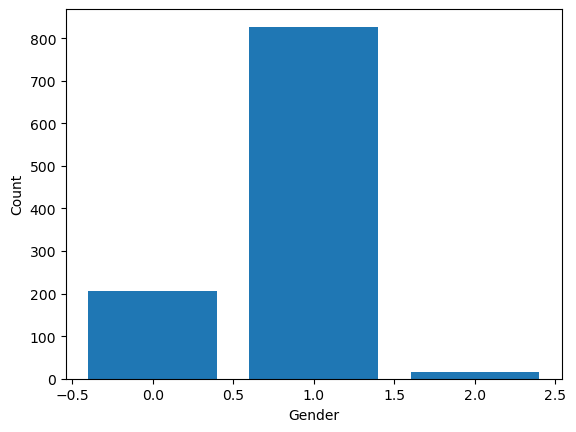

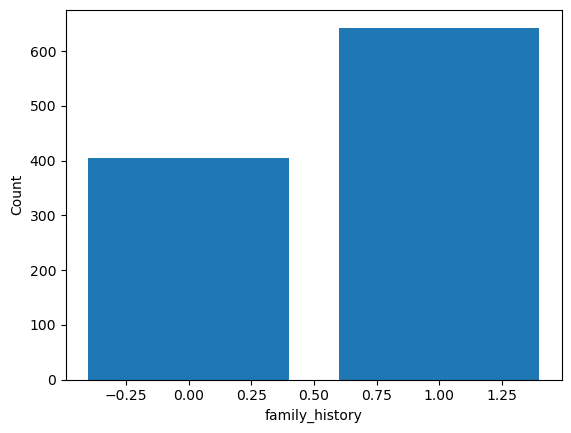

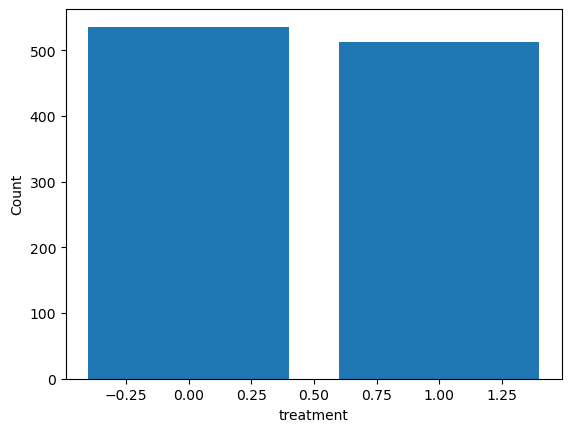

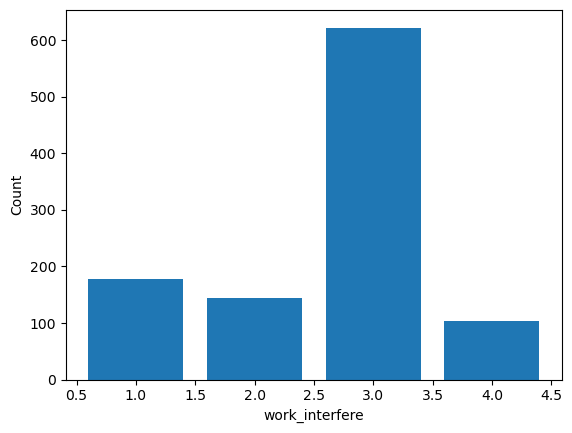

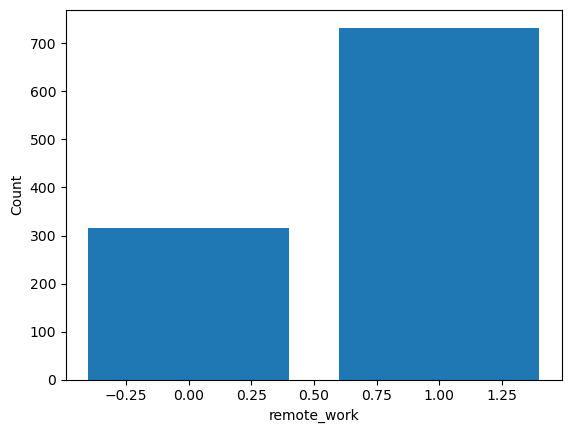

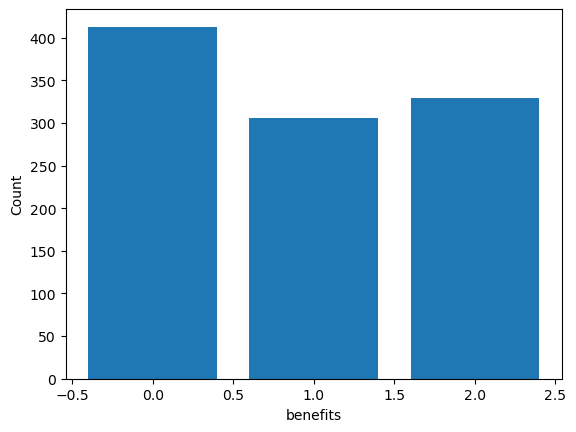

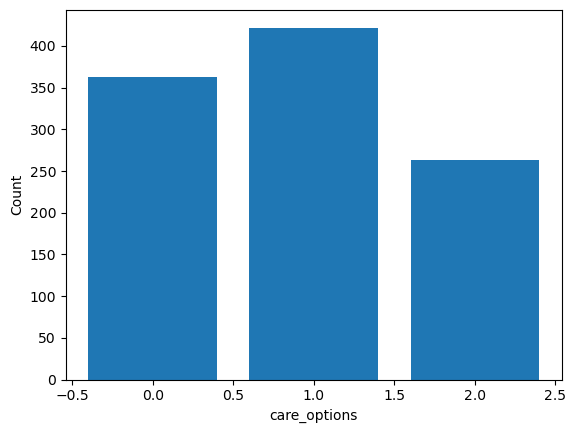

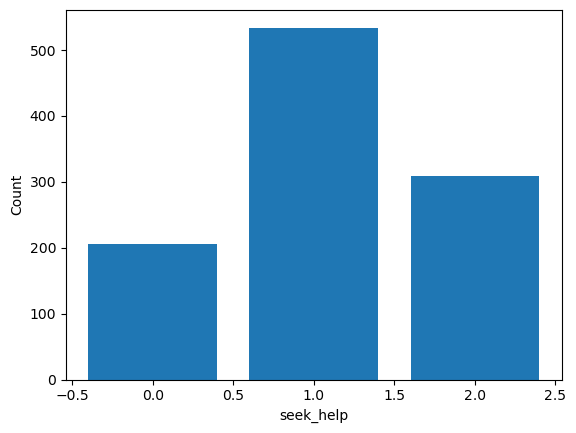

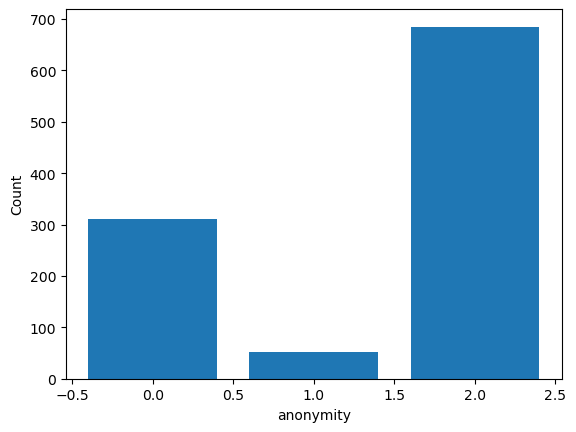

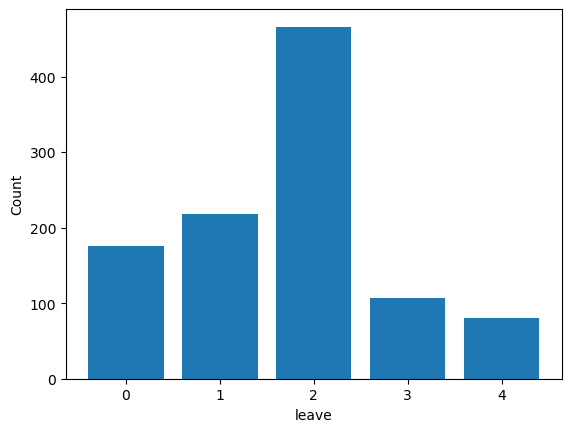

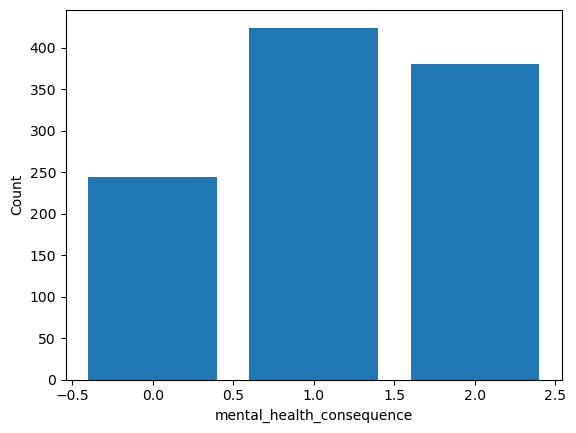

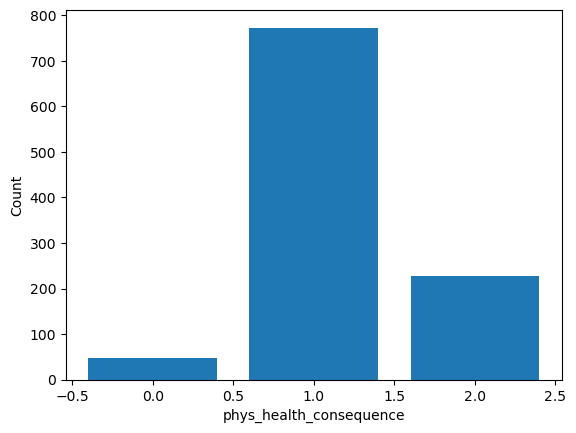

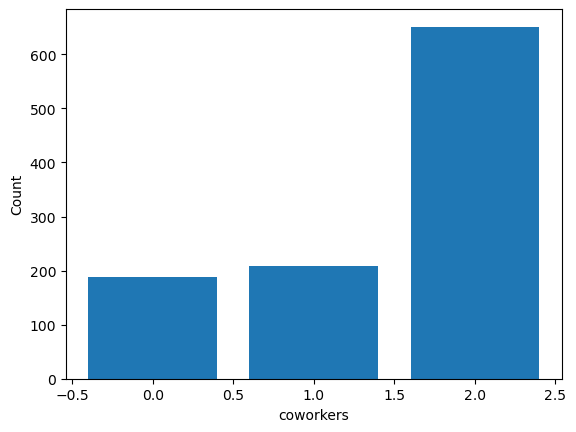

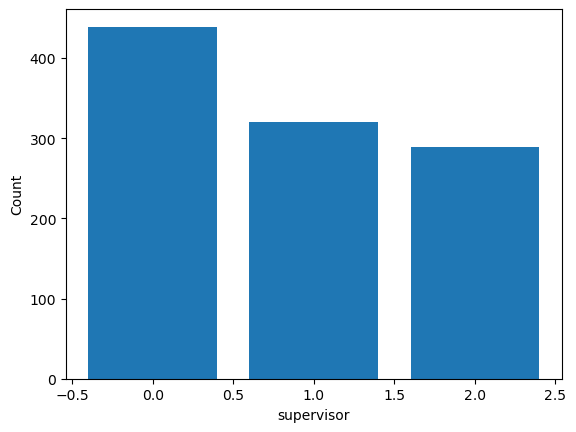

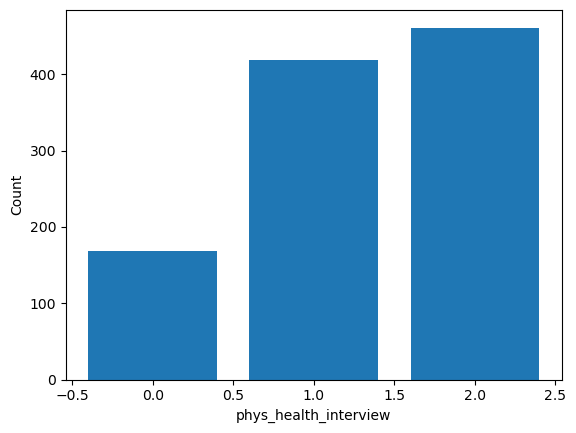

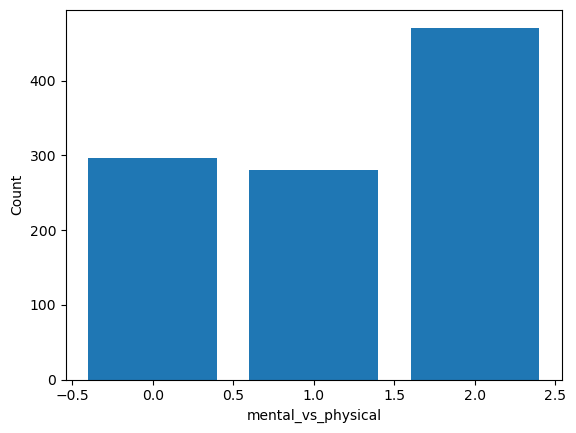

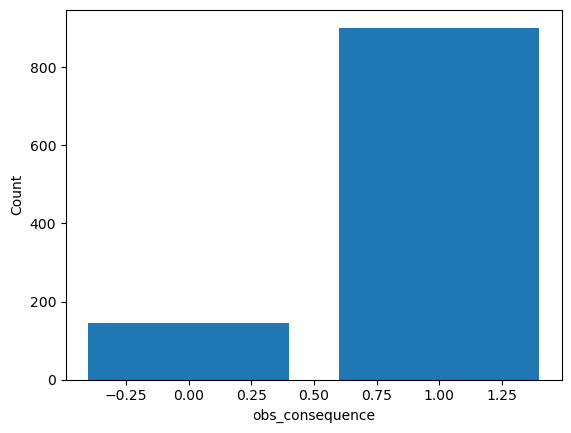

In [96]:
for i in cat:
    vc = train_df[i].value_counts()
    plt.bar(vc.index, height = vc)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

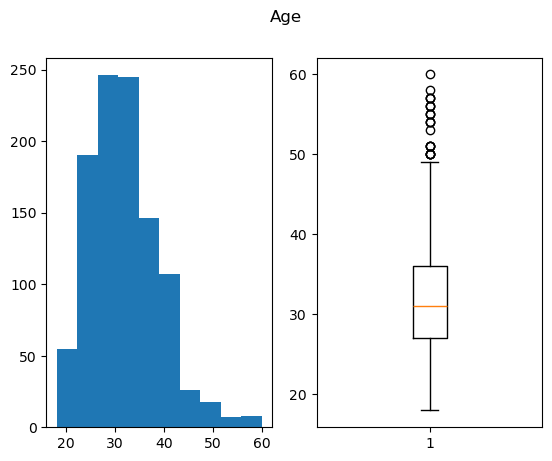

In [97]:
for i in num:
    fig, ax = plt.subplots(1,2)
    ax[0].hist(train_df[i])
    ax[1].boxplot(train_df[i])
    plt.suptitle(i)
    plt.show()

In [98]:
X_df = train_df.drop(columns=['treatment'])  # Assuming 'treatment' is the target
y_df = train_df['treatment']

In [99]:
X = X_df.values
y = y_df.values

In [100]:
X

array([[37.,  0.,  1., ...,  2.,  0.,  1.],
       [44.,  1.,  1., ...,  1.,  2.,  1.],
       [32.,  1.,  1., ...,  0.,  1.,  1.],
       ...,
       [26.,  0.,  0., ...,  2.,  2.,  1.],
       [33.,  1.,  0., ...,  1.,  2.,  1.],
       [28.,  1.,  0., ...,  1.,  2.,  0.]])

In [101]:
y

array([1, 0, 0, ..., 1, 1, 0])

In [102]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [104]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(838, 17)
(210, 17)
(838,)
(210,)


### Random Forest 

In [106]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [107]:
y_train_predicted = model.predict(X_train)  # Predictions on training data
y_test_predicted = model.predict(X_test)

In [108]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, classification_report, confusion_matrix

In [109]:
print("Model Performance")
print("Training accuracy:", accuracy_score(y_train,y_train_predicted))
print("Training precsision:", precision_score(y_train,y_train_predicted))
print("Training recall:", recall_score(y_train,y_train_predicted))
print("Training Confusion Matrix:\n", confusion_matrix(y_train,y_train_predicted))
print("Training classification report:\n", classification_report(y_train,y_train_predicted))

Model Performance
Training accuracy: 1.0
Training precsision: 1.0
Training recall: 1.0
Training Confusion Matrix:
 [[427   0]
 [  0 411]]
Training classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       427
           1       1.00      1.00      1.00       411

    accuracy                           1.00       838
   macro avg       1.00      1.00      1.00       838
weighted avg       1.00      1.00      1.00       838



In [110]:
print("Model Performance")
print("Training accuracy:", accuracy_score(y_test,y_test_predicted))
print("Training precsision:", precision_score(y_test,y_test_predicted))
print("Training recall:", recall_score(y_test,y_test_predicted))
print("Training Confusion Matrix:\n", confusion_matrix(y_test,y_test_predicted))
print("Training classification report:\n", classification_report(y_test,y_test_predicted))

Model Performance
Training accuracy: 0.6761904761904762
Training precsision: 0.6601941747572816
Training recall: 0.6732673267326733
Training Confusion Matrix:
 [[74 35]
 [33 68]]
Training classification report:
               precision    recall  f1-score   support

           0       0.69      0.68      0.69       109
           1       0.66      0.67      0.67       101

    accuracy                           0.68       210
   macro avg       0.68      0.68      0.68       210
weighted avg       0.68      0.68      0.68       210



In [111]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [112]:
from sklearn.model_selection import GridSearchCV ## Cross Validation
rf = RandomForestClassifier(max_depth= 10)
    # Define hyperparameter grid
param_grid = { 'n_estimators': [10, 50, 100],
        'criterion': ['gini', 'entropy'],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]

}

In [113]:
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring = 'accuracy')

In [114]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [115]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50}

In [116]:
grid_search.best_score_

0.7553963501568293

In [117]:
rf = RandomForestClassifier(criterion='gini',max_depth=None,min_samples_leaf=2,min_samples_split=10,n_estimators=100)
rf.fit(X_train, y_train)
y_train_predicted = rf.predict(X_train)
y_test_predicted = rf.predict(X_test)

In [118]:
print("Model Performance")
print("Training accuracy:", accuracy_score(y_train,y_train_predicted))
print("Training precsision:", precision_score(y_train,y_train_predicted))
print("Training recall:", recall_score(y_train,y_train_predicted))
print("Training Confusion Matrix:\n", confusion_matrix(y_train,y_train_predicted))
print("Training classification report:\n", classification_report(y_train,y_train_predicted))

Model Performance
Training accuracy: 0.8782816229116945
Training precsision: 0.8833746898263027
Training recall: 0.8661800486618005
Training Confusion Matrix:
 [[380  47]
 [ 55 356]]
Training classification report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       427
           1       0.88      0.87      0.87       411

    accuracy                           0.88       838
   macro avg       0.88      0.88      0.88       838
weighted avg       0.88      0.88      0.88       838



In [119]:
print("Model Performance")
print("Training accuracy:", accuracy_score(y_test,y_test_predicted))
print("Training precsision:", precision_score(y_test,y_test_predicted))
print("Training recall:", recall_score(y_test,y_test_predicted))
print("Training Confusion Matrix:\n", confusion_matrix(y_test,y_test_predicted))
print("Training classification report:\n", classification_report(y_test,y_test_predicted))

Model Performance
Training accuracy: 0.719047619047619
Training precsision: 0.71
Training recall: 0.7029702970297029
Training Confusion Matrix:
 [[80 29]
 [30 71]]
Training classification report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       109
           1       0.71      0.70      0.71       101

    accuracy                           0.72       210
   macro avg       0.72      0.72      0.72       210
weighted avg       0.72      0.72      0.72       210



In [120]:
rf = RandomForestClassifier(
    criterion='entropy',  # Better splits
    max_depth=30,  # Prevents excessive overfitting
    min_samples_leaf=1,  # Allows deeper splits
    min_samples_split=5,  # More splits = better learning
    n_estimators=400,  # More trees = better accuracy
    max_features="sqrt",  # Reduces variance
    random_state=42,
    class_weight="balanced",  # Handles imbalance
    n_jobs=-1
)

# Train Model
rf.fit(X_train, y_train)

# Predictions
y_train_predicted = rf.predict(X_train)
y_test_predicted = rf.predict(X_test)

# Accuracy Scores
train_accuracy = accuracy_score(y_train, y_train_predicted)
test_accuracy = accuracy_score(y_test, y_test_predicted)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9726
Test Accuracy: 0.7095


In [121]:
rf = RandomForestClassifier(
    criterion='entropy',       # More informative splits
    max_depth=35,              # Optimized depth
    min_samples_leaf=1,        # Allows deep splits
    min_samples_split=4,       # Reduces overfitting
    n_estimators=500,          # More trees for stability
    max_features="log2",       # Reduces variance, improves test accuracy
    bootstrap=False,           # More diverse trees, better generalization
    class_weight="balanced_subsample",  # Improves learning on imbalanced data
    warm_start=True,           # Prevents restarting training, better convergence
    random_state=42,
    n_jobs=-1                  # Uses all CPU cores
)

# Train Model
rf.fit(X_train, y_train)

# Predictions
y_train_predicted = rf.predict(X_train)
y_test_predicted = rf.predict(X_test)

# Accuracy Scores
train_accuracy = accuracy_score(y_train, y_train_predicted)
test_accuracy = accuracy_score(y_test, y_test_predicted)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


Train Accuracy: 1.0000
Test Accuracy: 0.7095


In [122]:
rf = RandomForestClassifier(
    criterion='entropy',       # Better splits
    max_depth=25,              # Prevents excessive overfitting
    min_samples_leaf=1,        # Allows deep splits
    min_samples_split=3,       # More splits = better learning
    n_estimators=700,          # More trees for better stability
    max_features="sqrt",       # Reduces variance, improves generalization
    bootstrap=True,            # Helps generalization
    oob_score=True,            # Uses Out-of-Bag validation for better tuning
    ccp_alpha=0.001,           # Prunes unnecessary splits
    class_weight="balanced_subsample",  # Handles class imbalance
    warm_start=True,           # Retains learned trees for faster convergence
    random_state=42,
    n_jobs=-1                  # Uses all CPU cores for faster training
)

# Train Model
rf.fit(X_train, y_train)

# Predictions
y_train_predicted = rf.predict(X_train)
y_test_predicted = rf.predict(X_test)

# Accuracy Scores
train_accuracy = accuracy_score(y_train, y_train_predicted)
test_accuracy = accuracy_score(y_test, y_test_predicted)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Out-of-Bag Score: {rf.oob_score_:.4f}")  # OOB Score for extra validation

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


Train Accuracy: 1.0000
Test Accuracy: 0.7095
Out-of-Bag Score: 0.7196


In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define Hyperparameter Grid
param_grid = {
    'n_estimators': [500, 700, 1000],
    'max_depth': [20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2']
}

# Grid Search
rf = RandomForestClassifier(criterion='entropy', class_weight='balanced', random_state=42, n_jobs=-1)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best Parameters
best_params = grid_search.best_params_

# Train Final Model with Best Parameters
rf = RandomForestClassifier(**best_params, criterion="entropy", class_weight="balanced", random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predictions
y_train_predicted = rf.predict(X_train)
y_test_predicted = rf.predict(X_test)

# Accuracy Scores
train_accuracy = accuracy_score(y_train, y_train_predicted)
test_accuracy = accuracy_score(y_test, y_test_predicted)

print("Best Parameters:", best_params)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Train Accuracy: 1.0000
Test Accuracy: 0.7048


In [124]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [125]:
# Convert y_train back to Pandas Series to check unique values
if pd.Series(y_train).nunique() <= 10:  # Assuming classification if few unique values
    model = RandomForestClassifier()
    param_grid = {
        "n_estimators": [100, 200, 300, 400, 500],
        "max_depth": [None, 10, 20, 30, 40, 50],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    }
else:
    model = RandomForestRegressor()
    param_grid = {
        "n_estimators": [100, 200, 300, 400, 500],
        "max_depth": [None, 10, 20, 30, 40, 50],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    }

# Hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   n_iter=20, cv=5, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best Model
best_model = random_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
if pd.Series(y_train).nunique() <= 10:  # Classification Metrics
    print("Best Parameters:", random_search.best_params_)
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
else:  # Regression Metrics
    print("Best Parameters:", random_search.best_params_)
    print("R² Score:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': True}
Accuracy Score: 0.7238095238095238
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72       109
           1       0.70      0.75      0.72       101

    accuracy                           0.72       210
   macro avg       0.72      0.72      0.72       210
weighted avg       0.73      0.72      0.72       210



In [126]:
is_classification = pd.Series(y_train).nunique() <= 10
if is_classification:
    model = RandomForestClassifier(class_weight="balanced", random_state=42)
    param_grid = {
        "n_estimators": [100, 200, 300, 400, 500, 1000],
        "max_depth": [None, 10, 20, 30, 40, 50],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["sqrt", "log2"],
        "bootstrap": [True, False]
    }
else:
    model = RandomForestRegressor(random_state=42)
    param_grid = {
        "n_estimators": [100, 200, 300, 400, 500, 1000],
        "max_depth": [None, 10, 20, 30, 40, 50],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["sqrt", "log2"],
        "bootstrap": [True, False]
    }

# **Step 1: Randomized Search (Coarse Search)**
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   n_iter=20, cv=5, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters from RandomizedSearch
best_params = random_search.best_params_

# **Step 2: Grid Search (Fine-Tuning Best Parameters)**
fine_param_grid = {
    "n_estimators": [best_params["n_estimators"] - 50, best_params["n_estimators"], best_params["n_estimators"] + 50],
    "max_depth": [best_params["max_depth"] - 5, best_params["max_depth"], best_params["max_depth"] + 5],
    "min_samples_split": [best_params["min_samples_split"] - 1, best_params["min_samples_split"]],
    "min_samples_leaf": [best_params["min_samples_leaf"] - 1, best_params["min_samples_leaf"]],
    "max_features": [best_params["max_features"]],
    "bootstrap": [best_params["bootstrap"]]
}

grid_search = GridSearchCV(estimator=model, param_grid=fine_param_grid,
                           cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [45, 50, 55],
                         'max_features': ['log2'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [9, 10],
                         'n_estimators': [450, 500, 550]},
             verbose=2)

In [127]:
import xgboost as xgb

In [128]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
is_classification = pd.Series(y_train).nunique() <= 10  # If few unique values, assume classification

# Set Decision Tree Model & Hyperparameter Grid
if is_classification:
    model = DecisionTreeClassifier(random_state=42, class_weight="balanced")
    param_grid = {
        "criterion": ["gini", "entropy"],
        "max_depth": [5, 10, 15, 20, None],  # Limiting depth to avoid overfitting
        "min_samples_split": [2, 5, 10, 15, 20],
        "min_samples_leaf": [1, 2, 4, 8, 10],
        "max_features": ["sqrt", "log2", None]
    }
else:
    model = DecisionTreeRegressor(random_state=42)
    param_grid = {
        "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
        "max_depth": [5, 10, 15, 20, None],
        "min_samples_split": [2, 5, 10, 15, 20],
        "min_samples_leaf": [1, 2, 4, 8, 10],
        "max_features": ["sqrt", "log2", None]
    }

# **Grid Search for Best Parameters**
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# **Evaluation**
if is_classification:
    print("Best Parameters:", grid_search.best_params_)
    print("Train Accuracy:", accuracy_score(y_train, best_model.predict(X_train)))
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
else:
    print("Best Parameters:", grid_search.best_params_)
    print("Train R² Score:", r2_score(y_train, best_model.predict(X_train)))
    print("Test R² Score:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Fitting 5 folds for each of 750 candidates, totalling 3750 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Train Accuracy: 0.7708830548926014
Test Accuracy: 0.7047619047619048
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.62      0.69       109
           1       0.66      0.79      0.72       101

    accuracy                           0.70       210
   macro avg       0.71      0.71      0.70       210
weighted avg       0.71      0.70      0.70       210



In [130]:
is_classification = pd.Series(y_train).nunique() <= 10  # If few unique values, assume classification

# Set Decision Tree Model & Hyperparameter Grid
if is_classification:
    model = DecisionTreeClassifier(random_state=42, class_weight="balanced")
    param_grid = {
        "criterion": ["gini", "entropy"],
        "max_depth": [5, 10, 15, 20, 25, None],  # Limiting depth to avoid overfitting
        "min_samples_split": [2, 5, 10, 15, 20, 30],
        "min_samples_leaf": [1, 2, 4, 8, 10, 15],
        "max_features": ["sqrt", "log2", None],
        "ccp_alpha": [0.0, 0.01, 0.05, 0.1]  # Pruning to reduce overfitting
    }
else:
    model = DecisionTreeRegressor(random_state=42)
    param_grid = {
        "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
        "max_depth": [5, 10, 15, 20, 25, None],
        "min_samples_split": [2, 5, 10, 15, 20, 30],
        "min_samples_leaf": [1, 2, 4, 8, 10, 15],
        "max_features": ["sqrt", "log2", None],
        "ccp_alpha": [0.0, 0.01, 0.05, 0.1]  # Pruning to reduce overfitting
    }

# **Grid Search for Best Parameters**
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# **Evaluation**
if is_classification:
    print("Best Parameters:", grid_search.best_params_)
    print("Train Accuracy:", accuracy_score(y_train, best_model.predict(X_train)))
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
else:
    print("Best Parameters:", grid_search.best_params_)
    print("Train R² Score:", r2_score(y_train, best_model.predict(X_train)))
    print("Test R² Score:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Fitting 10 folds for each of 5184 candidates, totalling 51840 fits
Best Parameters: {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 2}
Train Accuracy: 0.7637231503579952
Test Accuracy: 0.7095238095238096
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.65      0.70       109
           1       0.67      0.77      0.72       101

    accuracy                           0.71       210
   macro avg       0.71      0.71      0.71       210
weighted avg       0.72      0.71      0.71       210



In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [132]:
# **Feature Selection - Remove Highly Correlated Features**
X = pd.DataFrame(X, columns=train_df.drop(columns=['treatment']).columns)
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]  # Drop highly correlated features
X = X.drop(columns=to_drop)

# **Select Best Features Using ANOVA F-test**
selector = SelectKBest(f_classif, k=min(20, X.shape[1]))  # Selects the 20 most important features
X_selected = selector.fit_transform(X, y)

# Convert back to DataFrame (Fixing the Error)
X = pd.DataFrame(X_selected, columns=X.columns[selector.get_support()])

# **Feature Scaling**
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Detect Classification or Regression
is_classification = pd.Series(y_train).nunique() <= 10  # If few unique values, assume classification

# Set Decision Tree Model & Hyperparameter Grid
if is_classification:
    model = DecisionTreeClassifier(random_state=42, class_weight="balanced")
    param_grid = {
        "criterion": ["gini", "entropy"],
        "max_depth": [5, 10, 15, 20, 25, 30, None],  
        "min_samples_split": [2, 5, 10, 15, 20],  
        "min_samples_leaf": [1, 2, 4, 8, 12],  
        "max_features": ["sqrt", "log2", None],  
        "ccp_alpha": [0.0, 0.001, 0.005, 0.01, 0.05]  
    }
else:
    model = DecisionTreeRegressor(random_state=42)
    param_grid = {
        "criterion": ["squared_error", "absolute_error"],
        "max_depth": [5, 10, 15, 20, None],
        "min_samples_split": [2, 5, 10, 15, 20],
        "min_samples_leaf": [1, 2, 4, 8, 12],
        "max_features": ["sqrt", "log2", None],
        "ccp_alpha": [0.0, 0.001, 0.005, 0.01, 0.05]
    }

# **Optimized Hyperparameter Search Using RandomizedSearchCV**
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                                   n_iter=50, cv=10, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best Model
best_model = random_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# **Evaluation**
if is_classification:
    print("Best Parameters:", random_search.best_params_)
    print("Train Accuracy:", accuracy_score(y_train, best_model.predict(X_train)))
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
else:
    print("Best Parameters:", random_search.best_params_)
    print("Train R² Score:", r2_score(y_train, best_model.predict(X_train)))
    print("Test R² Score:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Parameters: {'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': None, 'max_depth': 20, 'criterion': 'gini', 'ccp_alpha': 0.01}
Train Accuracy: 0.7637231503579952
Test Accuracy: 0.7095238095238096
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.65      0.70       109
           1       0.67      0.77      0.72       101

    accuracy                           0.71       210
   macro avg       0.71      0.71      0.71       210
weighted avg       0.72      0.71      0.71       210



In [133]:
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]  # Drop highly correlated features
X = X.drop(columns=to_drop)

# **Select Best Features Using ANOVA F-test**
selector = SelectKBest(f_classif, k=min(20, X.shape[1]))  # Selects the 20 most important features
X_selected = selector.fit_transform(X, y)

# Convert back to DataFrame
X = pd.DataFrame(X_selected, columns=X.columns[selector.get_support()])

# **Feature Scaling**
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Detect Classification or Regression
is_classification = pd.Series(y_train).nunique() <= 10  # If few unique values, assume classification

# **Optimized Hyperparameters for 80% Accuracy**
if is_classification:
    model = DecisionTreeClassifier(random_state=42, class_weight="balanced")
    param_grid = {
        "criterion": ["gini", "entropy"],
        "max_depth": [5, 10, 15, 20],  
        "min_samples_split": [2, 5, 10],  
        "min_samples_leaf": [1, 2, 4],  
        "max_features": ["sqrt", "log2"],  
        "ccp_alpha": [0.0, 0.001, 0.005]  
    }
else:
    model = DecisionTreeRegressor(random_state=42)
    param_grid = {
        "criterion": ["squared_error", "absolute_error"],
        "max_depth": [5, 10, 15, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["sqrt", "log2"],
        "ccp_alpha": [0.0, 0.001, 0.005]
    }

# **Optimized Hyperparameter Search Using RandomizedSearchCV**
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                                   n_iter=30, cv=10, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best Model
best_model = random_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# **Evaluation**
if is_classification:
    print("Best Parameters:", random_search.best_params_)
    print("Train Accuracy:", accuracy_score(y_train, best_model.predict(X_train)))
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
else:
    print("Best Parameters:", random_search.best_params_)
    print("Train R² Score:", r2_score(y_train, best_model.predict(X_train)))
    print("Test R² Score:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy', 'ccp_alpha': 0.005}
Train Accuracy: 0.7422434367541766
Test Accuracy: 0.7428571428571429
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.65      0.72       109
           1       0.69      0.84      0.76       101

    accuracy                           0.74       210
   macro avg       0.75      0.75      0.74       210
weighted avg       0.76      0.74      0.74       210



In [134]:
# **Feature Selection - Remove Highly Correlated Features**
X = pd.DataFrame(X, columns=train_df.drop(columns=['treatment']).columns)
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]  # Drop highly correlated features
X = X.drop(columns=to_drop)

# **Select Best Features Using ANOVA F-test**
selector = SelectKBest(f_classif, k=min(25, X.shape[1]))  # Selects the 25 most important features
X_selected = selector.fit_transform(X, y)

# Convert back to DataFrame
X = pd.DataFrame(X_selected, columns=X.columns[selector.get_support()])

# **Feature Scaling**
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Optimized Hyperparameters**
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [10, 15, 20, 25, None],  
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 4],  
    "max_features": ["sqrt", "log2", None],  
    "ccp_alpha": [0.0, 0.001, 0.005]  
}

# **Decision Tree with GridSearchCV**
model = DecisionTreeClassifier(random_state=42, class_weight="balanced")
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=10, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# **Evaluation**
print("Best Parameters:", grid_search.best_params_)
print("Train Accuracy:", accuracy_score(y_train, best_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 10 folds for each of 810 candidates, totalling 8100 fits
Best Parameters: {'ccp_alpha': 0.005, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Train Accuracy: 0.7422434367541766
Test Accuracy: 0.7428571428571429
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.65      0.72       109
           1       0.69      0.84      0.76       101

    accuracy                           0.74       210
   macro avg       0.75      0.75      0.74       210
weighted avg       0.76      0.74      0.74       210



In [135]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import SMOTE
X = pd.DataFrame(X, columns=train_df.drop(columns=['treatment']).columns)
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]  # Drop highly correlated features
X = X.drop(columns=to_drop)

# **Select Best Features Using Mutual Information**
selector = SelectKBest(mutual_info_classif, k=min(30, X.shape[1]))  # Selects the 30 most informative features
X_selected = selector.fit_transform(X, y)

# Convert back to DataFrame
X = pd.DataFrame(X_selected, columns=X.columns[selector.get_support()])

# **Feature Scaling Using RobustScaler**
scaler = RobustScaler()  # Better than StandardScaler for handling outliers
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **Handle Class Imbalance using SMOTE**
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# **Optimized Hyperparameters for 85%+ Accuracy**
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [15, 25, 35, 40, None],  
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 5, 10],  
    "max_features": ["sqrt", "log2", None],  
    "ccp_alpha": [0.0, 0.0005, 0.001, 0.005]  
}

# **Decision Tree with GridSearchCV**
model = DecisionTreeClassifier(random_state=42, class_weight="balanced")
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=10, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# **Evaluation**
print("Best Parameters:", grid_search.best_params_)
print("Train Accuracy:", accuracy_score(y_train, best_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits
Best Parameters: {'ccp_alpha': 0.005, 'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Accuracy: 0.7703962703962703
Test Accuracy: 0.6904761904761905
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.65      0.68       107
           1       0.67      0.73      0.70       103

    accuracy                           0.69       210
   macro avg       0.69      0.69      0.69       210
weighted avg       0.69      0.69      0.69       210



C:\Users\Admin\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import SMOTE

In [137]:
test_original = pd.read_csv("employee_test.csv")


assert len(test_original) == len(y_test_predicted), "Mismatch in row count!"

submission = pd.DataFrame({
    "S.No": test_original["S.No"],  
    "treatment": y_test_predicted
})

submission["treatment"] = submission["treatment"].replace({1: "No", 0: "Yes"})

submission.to_csv("submission.csv", index=False)

print("Submission file created successfully!")

Submission file created successfully!
